In [1]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

request = SwarmRequest()
request.set_collection(
    "SW_OPER_MAGA_LR_1B", "SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F", 
)
request.set_products(
    measurements=["Bubble_Index", "Bubble_Probability",
                  "Ne", "Te",
                  "B_NEC"],
    models='Model = "MCO_SHA_2C" + "MLI_SHA_2C" + "MMA_SHA_2C-Primary" + "MMA_SHA_2C-Secondary"',
    residuals=True
)
data = request.get_between(
    start_time=dt.datetime(2016,1,1,9,7),
    end_time=dt.datetime(2016,1,1,9,10)
)
df = data.as_dataframe()

# Split apart the B_NEC values into separate columns
B_NEC = np.stack(df['B_NEC_res_Model'].values)
(df["B_N_res_Model"],
 df["B_E_res_Model"],
 df["B_C_res_Model"]) = (B_NEC[:,i] for i in (0,1,2))
df = df.drop("B_NEC_res_Model", axis=1)
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


,Spacecraft,Latitude,Longitude,Radius,Bubble_Index,Bubble_Probability,Ne,Te,B_N_res_Model,B_E_res_Model,B_C_res_Model
Timestamp,,,,,,,,,,,
2016-01-01 09:07:00,A,-16.923659,-52.119907,6830079.62,0.0,0.0,240306.1,2168.30,7.652885,0.753680,-2.718582
2016-01-01 09:07:01,A,-16.987667,-52.120848,6830087.28,0.0,0.0,244295.1,2160.03,7.449261,0.611383,-3.011097
2016-01-01 09:07:02,A,-17.051675,-52.121786,6830094.93,0.0,0.0,244612.6,2159.82,7.304530,0.650646,-3.502898
2016-01-01 09:07:03,A,-17.115682,-52.122722,6830102.57,0.0,0.0,246797.3,2153.04,7.151324,0.325657,-3.693331
2016-01-01 09:07:04,A,-17.179689,-52.123656,6830110.21,0.0,0.0,253884.9,2150.65,7.042566,0.078660,-3.848331


/home/ash/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


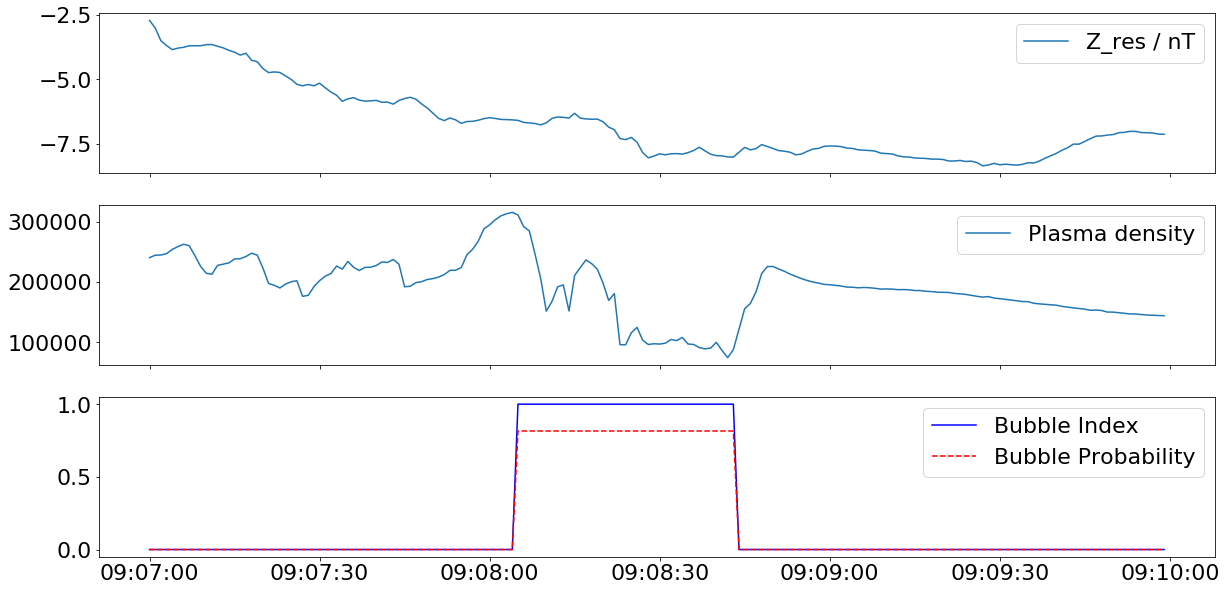

In [2]:
plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,10), sharex=True)
axes[0].plot(df['B_C_res_Model'], label='Z_res / nT')
axes[1].plot(df['Ne'], label='Plasma density')
axes[2].plot(df['Bubble_Index'], 'b-', label="Bubble Index")
axes[2].plot(df['Bubble_Probability'], 'r--', label="Bubble Probability")
for ax in axes:
    ax.legend()

In [3]:
print(request._request.decode())

<?xml version="1.0"?>
<wps:Execute xmlns:wps="http://www.opengis.net/wps/1.0.0" xmlns:ows="http://www.opengis.net/ows/1.1" version="1.0.0" service="WPS">
  <ows:Identifier>vires:fetch_filtered_data_async</ows:Identifier>
  <wps:DataInputs>
    <wps:Input>
      <ows:Identifier>collection_ids</ows:Identifier>
      <wps:Data>
        <wps:ComplexData mimeType="application/json"><![CDATA[{"Alpha": ["SW_OPER_MAGA_LR_1B", "SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F"]}]]></wps:ComplexData>
      </wps:Data>
    </wps:Input>
    <wps:Input>
      <ows:Identifier>model_ids</ows:Identifier>
      <wps:Data>
        <wps:LiteralData>Model="MCO_SHA_2C" + "MLI_SHA_2C" + "MMA_SHA_2C-Primary" + "MMA_SHA_2C-Secondary"</wps:LiteralData>
      </wps:Data>
    </wps:Input>
    <wps:Input>
      <ows:Identifier>begin_time</ows:Identifier>
      <wps:Data>
        <wps:LiteralData>2016-01-01T09:07:00Z</wps:LiteralData>
      </wps:Data>
    </wps:Input>
    <wps:Input>
      <ows:Identifier>end_time</ows:I

# The order of collections matters

above, the collections are set as: `"SW_OPER_MAGA_LR_1B", "SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F"` which sets:
```
<ows:Identifier>collection_ids</ows:Identifier>
      <wps:Data>
        <wps:ComplexData mimeType="application/json"><![CDATA[{"Alpha": ["SW_OPER_MAGA_LR_1B", "SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F"]}]]></wps:ComplexData>
      </wps:Data>
```

so the data uses the cadence of the `MAG` dataset (1 second)

# Repeat the above with `EFI` as the master

Below is the same expect collections are set as: `"SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F", "SW_OPER_MAGA_LR_1B"` so data should match the higher cadence `EFI` dataset (0.5 second)

i.e. this sets:
```
...
<wps:ComplexData mimeType="application/json"><![CDATA[{"Alpha": ["SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F", "SW_OPER_MAGA_LR_1B"]}]]></wps:ComplexData>
...
```

[1/1] Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Request details:
collection_ids: {'Alpha': ['SW_OPER_EFIA_LP_1B', 'SW_OPER_IBIATMS_2F', 'SW_OPER_MAGA_LR_1B']}
model_expression: Model="MCO_SHA_2C" + "MLI_SHA_2C" + "MMA_SHA_2C-Primary" + "MMA_SHA_2C-Secondary"
begin_time: None
end_time: None
variables: ['Bubble_Index', 'Bubble_Probability', 'Ne', 'Te', 'B_NEC_res_Model']
filters: None
sampling_step: None
response_type: None
custom_shc: None


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.089MB)


<?xml version="1.0"?>
<wps:Execute xmlns:wps="http://www.opengis.net/wps/1.0.0" xmlns:ows="http://www.opengis.net/ows/1.1" version="1.0.0" service="WPS">
  <ows:Identifier>vires:fetch_filtered_data_async</ows:Identifier>
  <wps:DataInputs>
    <wps:Input>
      <ows:Identifier>collection_ids</ows:Identifier>
      <wps:Data>
        <wps:ComplexData mimeType="application/json"><![CDATA[{"Alpha": ["SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F", "SW_OPER_MAGA_LR_1B"]}]]></wps:ComplexData>
      </wps:Data>
    </wps:Input>
    <wps:Input>
      <ows:Identifier>model_ids</ows:Identifier>
      <wps:Data>
        <wps:LiteralData>Model="MCO_SHA_2C" + "MLI_SHA_2C" + "MMA_SHA_2C-Primary" + "MMA_SHA_2C-Secondary"</wps:LiteralData>
      </wps:Data>
    </wps:Input>
    <wps:Input>
      <ows:Identifier>begin_time</ows:Identifier>
      <wps:Data>
        <wps:LiteralData>2016-01-01T09:07:00Z</wps:LiteralData>
      </wps:Data>
    </wps:Input>
    <wps:Input>
      <ows:Identifier>end_time</ows:I

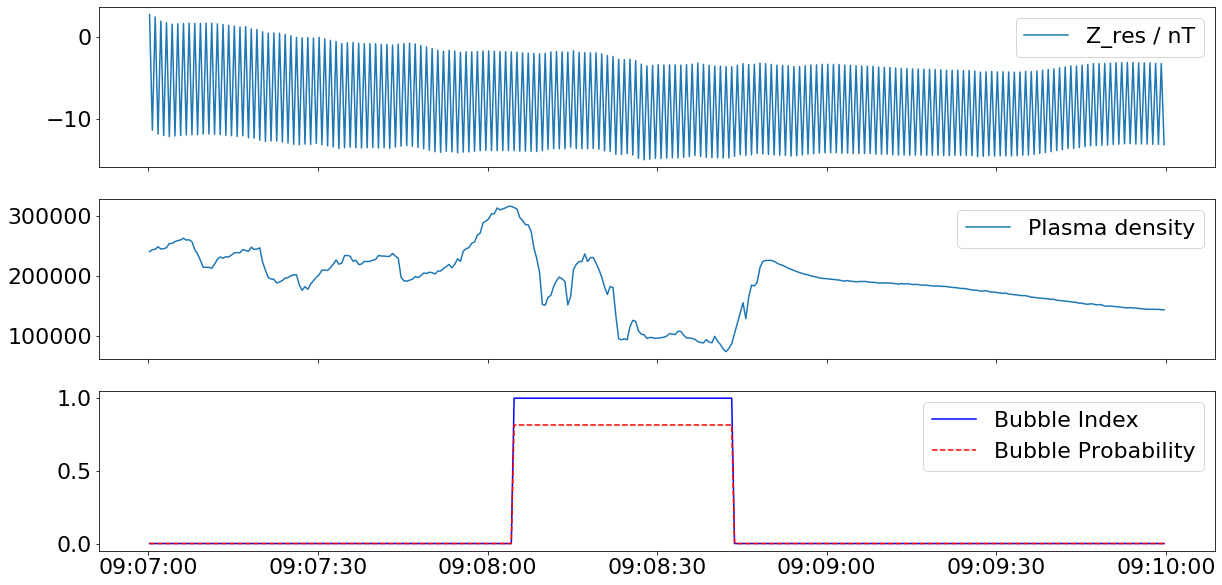

In [4]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

request = SwarmRequest()
request.set_collection(
    "SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F", "SW_OPER_MAGA_LR_1B"
)
request.set_products(
    measurements=["Bubble_Index", "Bubble_Probability",
                  "Ne", "Te",
                  "B_NEC"],
    models='Model = "MCO_SHA_2C" + "MLI_SHA_2C" + "MMA_SHA_2C-Primary" + "MMA_SHA_2C-Secondary"',
    residuals=True
)
print(request)

data = request.get_between(
    start_time=dt.datetime(2016,1,1,9,7),
    end_time=dt.datetime(2016,1,1,9,10)
)
df = data.as_dataframe()
print(request._request.decode())

# Split apart the B_NEC values into separate columns
B_NEC = np.stack(df['B_NEC_res_Model'].values)
(df["B_N_res_Model"],
 df["B_E_res_Model"],
 df["B_C_res_Model"]) = (B_NEC[:,i] for i in (0,1,2))
df = df.drop("B_NEC_res_Model", axis=1)
df.head()

plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,10), sharex=True)
axes[0].plot(df['B_C_res_Model'], label='Z_res / nT')
axes[1].plot(df['Ne'], label='Plasma density')
axes[2].plot(df['Bubble_Index'], 'b-', label="Bubble Index")
axes[2].plot(df['Bubble_Probability'], 'r--', label="Bubble Probability")
for ax in axes:
    ax.legend()

In [6]:
df.head()

,Spacecraft,Latitude,Longitude,Radius,Bubble_Index,Bubble_Probability,Ne,Te,B_N_res_Model,B_E_res_Model,B_C_res_Model
Timestamp,,,,,,,,,,,
2016-01-01 09:07:00.197000027,A,-16.936315,-52.120090,6830080.51,0.0,0.0,240306.1,2168.30,10.512947,-0.650556,2.742087
2016-01-01 09:07:00.696000099,A,-16.968255,-52.120560,6830084.10,0.0,0.0,243403.2,2164.87,3.056918,2.774569,-11.363313
2016-01-01 09:07:01.197000027,A,-17.000323,-52.121030,6830088.17,0.0,0.0,244295.1,2160.03,10.305433,-0.795151,2.437172
2016-01-01 09:07:01.696000099,A,-17.032263,-52.121499,6830091.76,0.0,0.0,248306.5,2159.74,2.918249,2.817301,-11.836250
2016-01-01 09:07:02.197000027,A,-17.064331,-52.121968,6830095.82,0.0,0.0,244612.6,2159.82,10.156758,-0.758168,1.933002


In [10]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

request = SwarmRequest()
request.set_collection(
    "SW_OPER_EFIA_LP_1B", "SW_OPER_IBIATMS_2F", "SW_OPER_MAGA_LR_1B"
)
request.set_products(
    measurements=["Bubble_Index", "Bubble_Probability",
                  "Ne", "Te",
                  "B_NEC"],
    models='Model = "MCO_SHA_2C"'# + "MLI_SHA_2C" + "MMA_SHA_2C-Primary" + "MMA_SHA_2C-Secondary"',
#     residuals=True
)
print(request)

data = request.get_between(
    start_time=dt.datetime(2016,1,1,9,7),
    end_time=dt.datetime(2016,1,1,9,10)
)
df = data.as_dataframe()

[1/1] Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Request details:
collection_ids: {'Alpha': ['SW_OPER_EFIA_LP_1B', 'SW_OPER_IBIATMS_2F', 'SW_OPER_MAGA_LR_1B']}
model_expression: Model="MCO_SHA_2C"
begin_time: None
end_time: None
variables: ['Bubble_Index', 'Bubble_Probability', 'Ne', 'Te', 'B_NEC', 'B_NEC_Model']
filters: None
sampling_step: None
response_type: None
custom_shc: None


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.098MB)


In [11]:
df.head()

,Spacecraft,Latitude,Longitude,Radius,Bubble_Index,Bubble_Probability,Ne,Te,B_NEC,B_NEC_Model
Timestamp,,,,,,,,,,
2016-01-01 09:07:00.197000027,A,-16.936315,-52.120090,6830080.51,0.0,0.0,240306.1,2168.30,"[16781.239, -5186.1714, -7357.5261]","[16838.041553824238, -5188.684753614487, -7349..."
2016-01-01 09:07:00.696000099,A,-16.968255,-52.120560,6830084.10,0.0,0.0,243403.2,2164.87,"[16766.5613, -5179.1952, -7385.3943]","[16830.825804461834, -5185.134302529962, -7363..."
2016-01-01 09:07:01.197000027,A,-17.000323,-52.121030,6830088.17,0.0,0.0,244295.1,2160.03,"[16766.5613, -5179.1952, -7385.3943]","[16823.58339867948, -5181.565154837134, -7377...."
2016-01-01 09:07:01.696000099,A,-17.032263,-52.121499,6830091.76,0.0,0.0,248306.5,2159.74,"[16751.9623, -5172.025900000001, -7413.3993]","[16816.377818239853, -5178.008819596262, -7391..."
2016-01-01 09:07:02.197000027,A,-17.064331,-52.121968,6830095.82,0.0,0.0,244612.6,2159.82,"[16751.9623, -5172.025900000001, -7413.3993]","[16809.145712055317, -5174.433800849796, -7404..."


`B_NEC` stays the same over two sample points because it is getting the nearest neighbour within `MAG`. But `B_NEC_Model` changes every time step - because it is using the 0.5-second-sampled position?